In [2]:
from lazylib import make, GoogleLeNetEE, device, takeConfusionMatrix, takeRocCurve, now, register, takeFromDisk
import torch

/home/luizp/projects/pibit/pibit/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
n = now()
epocs = 1
metrics = make(
    EPOCHS=epocs, 
    BATCH_SIZE=128, 
    LEARNING_RATE=1e-3, 
    csv_path="/home/luizp/projects/pibit/src/data/processed/csv/cicClean.csv", 
    out_path=f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}',
    MODEL=GoogleLeNetEE().to(device()), 
    SEED=1701,
    xcol=1
    ) 
torch.save(metrics.state_dict(), f"/home/luizp/projects/pibit/src/0utput/models/{n}_alexnet_{epocs}.nnModel")

[31-07-2024 18-19-12] Epoch 001 Acc: 0.7395 Loss: 0.45085694: 100%|██████████| 782/782 [03:23<00:00,  3.84it/s]
[31-07-2024 18-28-57] Epoch 001 Val. Acc: 0.9967 Val. Loss: 0.02093424: 100%|██████████| 7032/7032 [09:42<00:00, 12.07it/s] 


Finished experiment!


In [4]:
n = '31-07-2024 01-00-29'

In [6]:
train = takeFromDisk(f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}-train--1.txt')
valid = takeFromDisk(f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}-valid--1.txt')

In [7]:
import numpy as np
from sklearn.metrics import auc, roc_curve, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

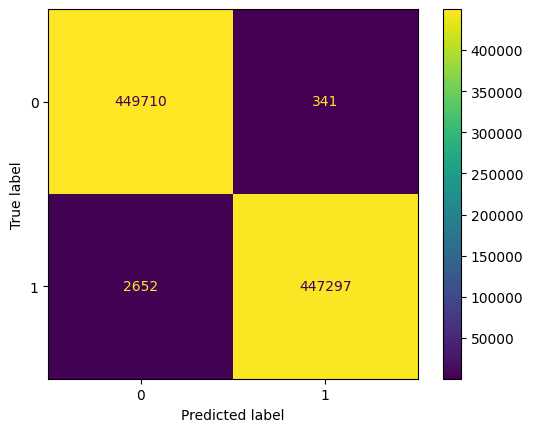

In [8]:
ConfusionMatrixDisplay(np.array(valid[0]['confusion_matrix'])).plot()

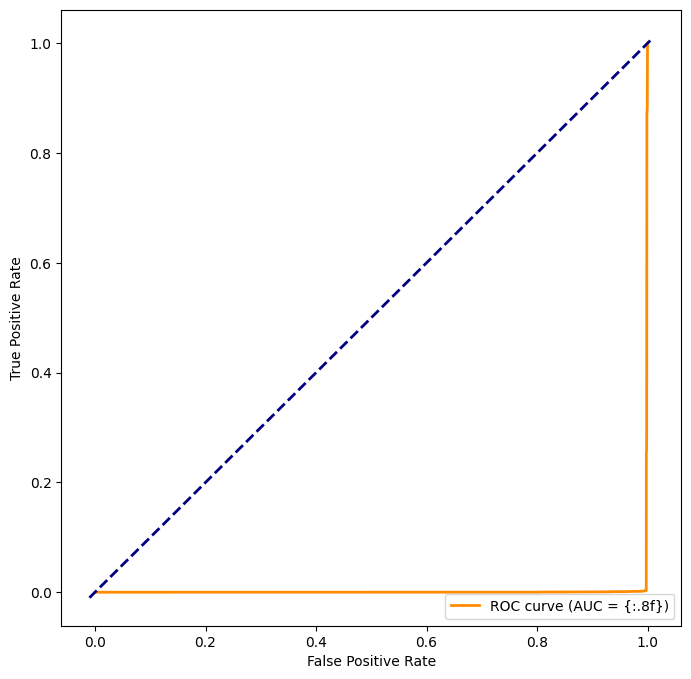

In [9]:
takeRocCurve(valid)

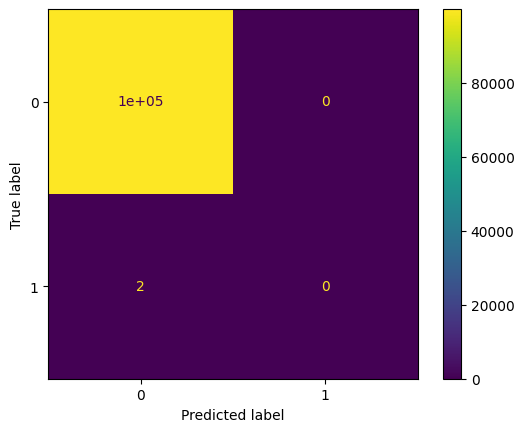

In [7]:
ConfusionMatrixDisplay(np.array(train[0]['confusion_matrix'])).plot()

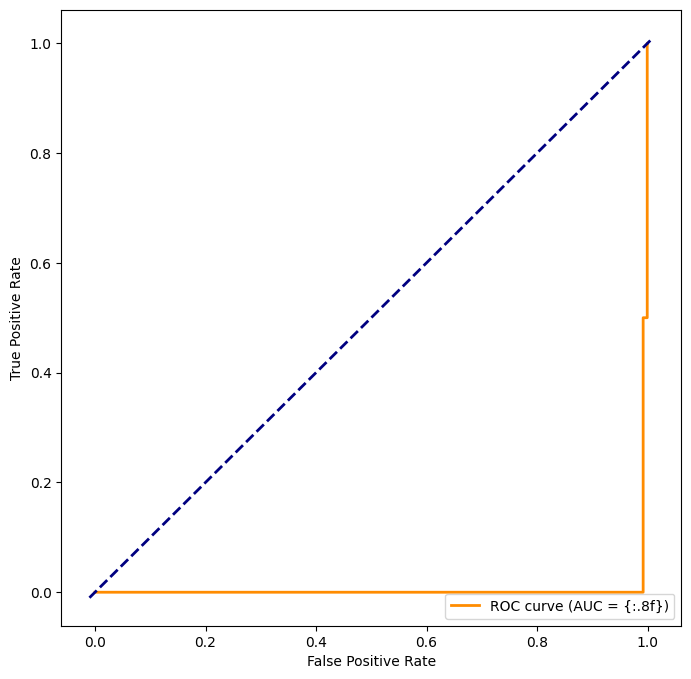

In [8]:
takeRocCurve(train)